In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from pathlib import Path
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# options
pd.set_option('max_columns',100)
plt.style.use('fivethirtyeight')
warnings.simplefilter('ignore')
seed = 1

In [3]:
# Data dirctory
data_dir = Path('../data/')
data_file = data_dir / 'data_raw.csv'

# Data
# 0:AAR / 1:EAD / 2:ADR / 3:EDD는 고정  , 나머지는 순서 상관 없음
Data = pd.read_csv(data_file, index_col=0)

In [44]:
Data.head(30)

,AAR,EAD,ADR,EDD,year,month,day,hour,DayName,Arpt_cond,P_Airp,P_AAR,P_ADR,Arrival_remainder,Departure_remainder,WD_400,WD_500,WD_700,WD_850,WD_925,WD_1000,WS_400,WS_500,WS_700,WS_850,WS_925,WS_1000,WD,WSPD,WS_GST,VIS,WC,TMP,TD,PS,PA,RN,HM,CA_TOT,CLA_1LYR,BASE_1LYR,CLA_2LYR,BASE_2LYR,CLA_3LYR,BASE_3LYR,CLA_4LYR,BASE_4LYR,RVR,WDIR_t6,WSPD_t6,WG_t6,VIS_t6,WC_t6,CLA_1LYR_t6,BASE_1LYR_t6,CLA_2LYR_t6,BASE_2LYR_t6,CLA_3LYR_t6,BASE_3LYR_t6,WDIR_t12,WSPD_t12,WG_t12,VIS_t12,WC_t12,CLA_1LYR_t12,BASE_1LYR_t12,CLA_2LYR_t12,BASE_2LYR_t12,CLA_3LYR_t12,BASE_3LYR_t12,WDIR_t18,WSPD_t18,WG_t18,VIS_t18,WC_t18,CLA_1LYR_t18,BASE_1LYR_t18,CLA_2LYR_t18,BASE_2LYR_t18,CLA_3LYR_t18,BASE_3LYR_t18,WDIR_t24,WSPD_t24,WG_t24,VIS_t24,WC_t24,CLA_1LYR_t24,BASE_1LYR_t24,CLA_2LYR_t24,BASE_2LYR_t24,CLA_3LYR_t24,BASE_3LYR_t24,WS_over20
0,3.0,2.0,11.0,11.0,2018,1,1,0,1,1.0,1.0,0.0,0.0,0.0,0.0,285.0,295.0,300.0,320.0,325.0,245.0,72.0,47.0,43.0,28.0,19.0,3.0,34,5,0.0,1000,1,-26,-115,10268,10259,0.0,50.0,0,0.0,400.0,0.0,400.0,0.0,400.0,0.0,400.0,1000.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0
1,0.0,1.0,4.0,5.0,2018,1,1,1,1,1.0,1.0,3.0,11.0,0.0,0.0,285.0,295.0,300.0,320.0,325.0,245.0,72.0,47.0,43.0,28.0,19.0,3.0,3,1,0.0,1000,1,-21,-117,10266,10257,0.0,47.0,0,0.0,400.0,0.0,400.0,0.0,400.0,0.0,400.0,1000.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0
2,0.0,1.0,4.0,4.0,2018,1,1,2,1,1.0,1.0,0.0,4.0,1.0,1.0,285.0,295.0,300.0,320.0,325.0,245.0,72.0,47.0,43.0,28.0,19.0,3.0,35,1,0.0,1000,1,-36,-113,10266,10257,0.0,55.0,0,0.0,400.0,0.0,400.0,0.0,400.0,0.0,400.0,1000.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0
3,2.0,0.0,1.0,1.0,2018,1,1,3,1,1.0,1.0,0.0,4.0,1.0,0.0,285.0,295.0,300.0,320.0,325.0,245.0,72.0,47.0,43.0,28.0,19.0,3.0,0,0,0.0,1000,1,-42,-111,10269,10260,0.0,58.0,0,0.0,400.0,0.0,400.0,0.0,400.0,0.0,400.0,1000.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0
4,18.0,16.0,0.0,1.0,2018,1,1,4,1,1.0,1.0,2.0,1.0,0.0,0.0,285.0,295.0,300.0,320.0,325.0,245.0,72.0,47.0,43.0,28.0,19.0,3.0,19,1,0.0,1000,1,-41,-104,10271,10262,0.0,61.0,0,0.0,400.0,0.0,400.0,0.0,400.0,0.0,400.0,1000.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0
5,37.0,33.0,1.0,0.0,2018,1,1,5,1,1.0,1.0,18.0,0.0,0.0,1.0,285.0,295.0,300.0,320.0,325.0,245.0,72.0,47.0,43.0,28.0,19.0,3.0,19,1,0.0,1000,1,-34,-112,10270,10261,0.0,55.0,0,0.0,400.0,0.0,400.0,0.0,400.0,0.0,400.0,1000.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0
6,28.0,35.0,4.0,13.0,2018,1,1,6,1,1.0,1.0,37.0,1.0,0.0,0.0,295.0,290.0,300.0,300.0,280.0,235.0,79.0,63.0,42.0,30.0,9.0,4.0,7,1,0.0,1000,1,-49,-113,10271,10262,0.0,61.0,0,0.0,400.0,0.0,400.0,0.0,400.0,0.0,400.0,1000.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0
7,27.0,28.0,26.0,33.0,2018,1,1,7,1,1.0,1.0,28.0,4.0,7.0,9.0,295.0,290.0,300.0,300.0,280.0,235.0,79.0,63.0,42.0,30.0,9.0,4.0,6,2,0.0,1000,1,-45,-108,10273,10264,0.0,61.0,0,0.0,400.0,0.0,400.0,0.0,400.0,0.0,400.0,1000.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0.0,0.0,0.0,9999.0,0,0,400.0,0,400.0,0,400.0,0
8,25

# Continuous Variables

<AxesSubplot:title={'center':'t'}, xlabel='AAR'>

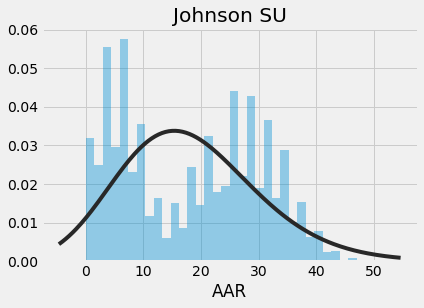

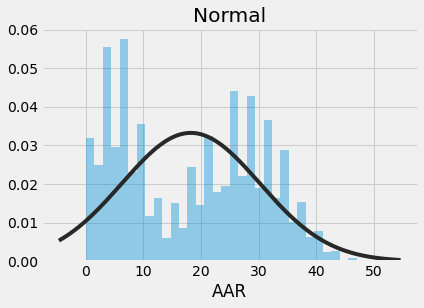

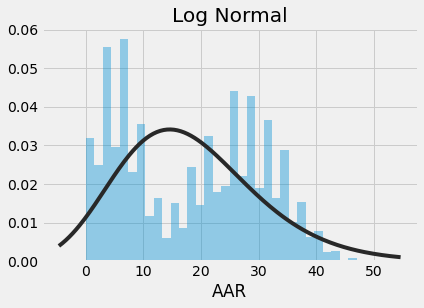

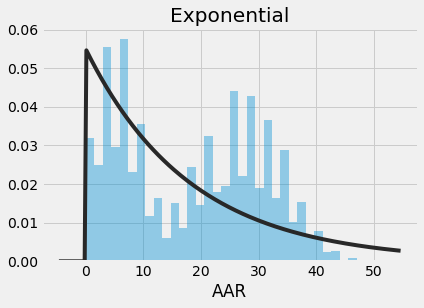

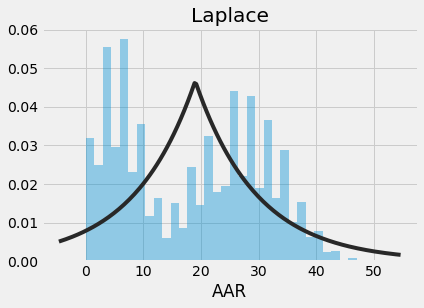

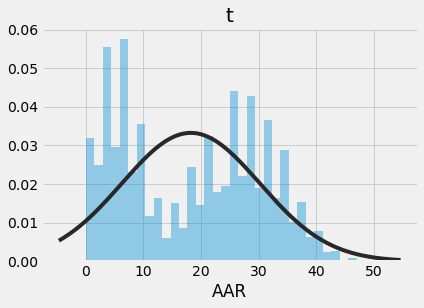

In [5]:
y = Data['AAR']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)
plt.figure(4); plt.title('Exponential')
sns.distplot(y, kde=False, fit=stats.expon)
plt.figure(5); plt.title('Laplace')
sns.distplot(y, kde=False, fit=stats.laplace)
#plt.figure(6); plt.title('Poisson ')
#sns.distplot(y, kde=False, fit=stats.poisson)
plt.figure(7); plt.title('t')
sns.distplot(y, kde=False, fit=stats.t)


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26304 entries, 0 to 26303
Data columns (total 92 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AAR                  26304 non-null  float64
 1   EAD                  26304 non-null  float64
 2   ADR                  26304 non-null  float64
 3   EDD                  26304 non-null  float64
 4   year                 26304 non-null  int64  
 5   month                26304 non-null  int64  
 6   day                  26304 non-null  int64  
 7   hour                 26304 non-null  int64  
 8   DayName              26304 non-null  int64  
 9   Arpt_cond            26304 non-null  float64
 10  P_Airp               26304 non-null  float64
 11  P_AAR                26304 non-null  float64
 12  P_ADR                26304 non-null  float64
 13  Arrival_remainder    26304 non-null  float64
 14  Departure_remainder  26304 non-null  float64
 15  WD_400               26304 non-null 

In [7]:
Data.describe()

,AAR,EAD,ADR,EDD,year,month,day,hour,DayName,Arpt_cond,P_Airp,P_AAR,P_ADR,Arrival_remainder,Departure_remainder,WD_400,WD_500,WD_700,WD_850,WD_925,WD_1000,WS_400,WS_500,WS_700,WS_850,WS_925,WS_1000,WD,WSPD,WS_GST,VIS,WC,TMP,TD,PS,PA,RN,HM,CA_TOT,CLA_1LYR,BASE_1LYR,CLA_2LYR,BASE_2LYR,CLA_3LYR,BASE_3LYR,CLA_4LYR,BASE_4LYR,RVR,WDIR_t6,WSPD_t6,WG_t6,VIS_t6,WC_t6,CLA_1LYR_t6,BASE_1LYR_t6,CLA_2LYR_t6,BASE_2LYR_t6,CLA_3LYR_t6,BASE_3LYR_t6,WDIR_t12,WSPD_t12,WG_t12,VIS_t12,WC_t12,CLA_1LYR_t12,BASE_1LYR_t12,CLA_2LYR_t12,BASE_2LYR_t12,CLA_3LYR_t12,BASE_3LYR_t12,WDIR_t18,WSPD_t18,WG_t18,VIS_t18,WC_t18,CLA_1LYR_t18,BASE_1LYR_t18,CLA_2LYR_t18,BASE_2LYR_t18,CLA_3LYR_t18,BASE_3LYR_t18,WDIR_t24,WSPD_t24,WG_t24,VIS_t24,WC_t24,CLA_1LYR_t24,BASE_1LYR_t24,CLA_2LYR_t24,BASE_2LYR_t24,CLA_3LYR_t24,BASE_3LYR_t24
count,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26300.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.00000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.00000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000
mean,18.232892,18.272240,18.228444,18.268590,2019.000912,6.521898,15.732664,11.500000,3.994526,1.386253,1.386253,18.232816,18.227798,1.352228,1.619145,238.671305,246.598996,239.817518,224.696624,239.305429,245.049042,28.017108,26.827327,18.859261,13.499316,32.653057,32.568887,20.289120,7.346031,0.195712,856.451680,1.851277,126.034976,51.509846,10169.379600,10161.188793,1.202631,62.678783,3.889561,2.525243,158.064781,2.224262,285.540146,0.857322,366.143362,0.018666,399.244602,976.178870,207.107284,8.463808,3.910698,7701.336907,0.733044,2.096183,161.35200,2.607284,274.388040,0.966279,358.172711,210.563412,8.778323,4.224529,7509.819685,0.62576,2.274331,136.525471,2.680201,261.565769,1.034862,347.950122,211.686436,8.899407,4.401460,7371.006235,0.612074,2.441682,117.527524,2.740572,253.133896,1.071244,341.830900,213.550411,8.906782,4.436017,7260.989659,0.590595,2.588352,103.880284,2.802692,248.694077,1.096867,340.085538
std,11.999505,12.334306,12.860326,12.971663,0.816698,3.449052,8.801537,6.922318,1.999574,0.695838,0.695838,11.999614,12.860815,2.173828,2.865303,87.479287,76.872201,86.193706,97.687550,86.429591,79.445524,23.535208,20.516297,14.338600,11.781360,30.165960,26.799527,11.175468,4.328560,2.445019,255.826347,1.397640,102.231138,111.500638,87.164298,86.903710,10.965191,17.406733,3.090803,2.264370,157.075684,3.007512,152.198269,2.394864,95.138259,0.384361,15.565101,145.270943,111.922266,4.234135,9.880565,2695.320871,1.711454,2.073275,182.31623,3.294151,157.570422,2.576725,107.256663,108.846791,4.135302,10.169323,2678.484392,1.57804,2.069455,174.097153,3.297800,162.598649,2.654760,119.959705,108.127146,4.113157,10.300527,2632.217206,1.561761,2.071476,164.938115,3.304386,165.003890,2.694303,126.571335,107.913814,4.103337,10.282480,2568.705974,1.527630,2.062446,156.374507,3.312570,165.896064,2.721600,128.065885
min,0.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

<AxesSubplot:>

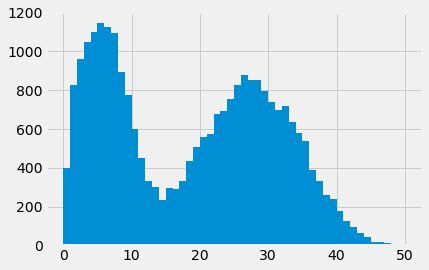

In [8]:
Data['AAR'].hist(bins = 50)

In [15]:
Data['AAR'].quantile(np.arange(0, 1, .01))

0.00     0.0
0.01     0.0
0.02     1.0
0.03     1.0
0.04     1.0
        ... 
0.95    37.0
0.96    38.0
0.97    39.0
0.98    40.0
0.99    41.0
Name: AAR, Length: 100, dtype: float64

In [31]:
Data.groupby('AAR').mean()

,EAD,ADR,EDD,year,month,day,hour,DayName,Arpt_cond,P_Airp,P_AAR,P_ADR,Arrival_remainder,Departure_remainder,WD_400,WD_500,WD_700,WD_850,WD_925,WD_1000,WS_400,WS_500,WS_700,WS_850,WS_925,WS_1000,WD,WSPD,WS_GST,VIS,WC,TMP,TD,PS,PA,RN,HM,CA_TOT,CLA_1LYR,BASE_1LYR,CLA_2LYR,BASE_2LYR,CLA_3LYR,BASE_3LYR,CLA_4LYR,BASE_4LYR,RVR,WDIR_t6,WSPD_t6,WG_t6,VIS_t6,WC_t6,CLA_1LYR_t6,BASE_1LYR_t6,CLA_2LYR_t6,BASE_2LYR_t6,CLA_3LYR_t6,BASE_3LYR_t6,WDIR_t12,WSPD_t12,WG_t12,VIS_t12,WC_t12,CLA_1LYR_t12,BASE_1LYR_t12,CLA_2LYR_t12,BASE_2LYR_t12,CLA_3LYR_t12,BASE_3LYR_t12,WDIR_t18,WSPD_t18,WG_t18,VIS_t18,WC_t18,CLA_1LYR_t18,BASE_1LYR_t18,CLA_2LYR_t18,BASE_2LYR_t18,CLA_3LYR_t18,BASE_3LYR_t18,WDIR_t24,WSPD_t24,WG_t24,VIS_t24,WC_t24,CLA_1LYR_t24,BASE_1LYR_t24,CLA_2LYR_t24,BASE_2LYR_t24,CLA_3LYR_t24,BASE_3LYR_t24,WS_over20
AAR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1.596010,5.379052,5.246883,2018.827930,6.072319,15.134663,2.231920,3.591022,1.501247,1.473815,2.950125,8.743142,0.743142,1.246883,239.476309,244.364090,242.169576,219.413965,240.922693,245.698254,29.566085,27.381546,18.730673,14.189526,32.174564,29.551122,19.104738,7.304239,1.059850,806.670823,2.152120,92.705736,35.807980,10174.274314,10165.985037,1.745636,68.780549,3.990025,2.807980,172.960100,2.012469,297.930175,0.845387,367.057357,0.000000,400.000000,930.790524,195.935162,9.092269,5.431421,6609.827930,1.159601,2.231920,151.922693,2.750623,263.977556,1.316708,346.234414,196.857855,9.563591,5.827930,6597.870324,1.079800,2.259352,134.289277,3.024938,247.942643,1.364090,338.678304,196.608479,9.354115,5.558603,6820.780549,0.977556,2.289277,127.334165,2.850374,253.802993,1.416459,330.598504,202.693267,9.700748,5.870324,6684.942643,0.965087,2.610973,104.394015,3.052369,236.127182,1.478803,328.029925,0.039900
1.0,1.904704,6.176116,5.921592,2018.951749,6.272618,15.773221,2.571773,3.720145,1.468034,1.442702,3.524729,9.831122,0.648975,1.273824,232.545235,241.351025,235.193004,223.377563,237.454765,243.769602,26.539204,26.702051,18.621230,13.480097,32.893848,31.267793,18.135103,6.646562,0.260555,827.925211,1.992762,112.248492,58.021713,10165.299156,10157.074789,2.119421,70.276236,3.978287,2.645356,169.184560,2.285887,285.536791,0.868516,364.794934,0.038601,398.443908,961.529554,200.398070,8.718938,4.338963,7151.406514,0.974668,2.296743,141.744270,2.770808,264.270205,1.179735,349.794934,194.065139,8.967431,4.512666,7139.591074,0.898673,2.378770,130.354644,2.908323,254.022919,1.256936,344.221954,187.744270,8.810615,4.682750,6982.475271,0.884198,2.474065,120.556092,2.885404,250.589867,1.282268,339.493366,193.968637,8.891435,4.583836,6883.231604,0.901086,2.630881,104.752714,3.077201,235.898673,1.293124,333.908323,0.016888
2.0,2.648958,6.597917,6.545833,2019.169792,6.319792,15.919792,4.267708,3.831250,1.480208,1.442708,4.112500,10.316667,0.734375,1.100000,224.239583,246.109375,239.458333,220.791667,231.286458,242.401042,25.100000,27.916667,20.191667,13.576042,29.677083,29.392708,19.507292,6.287500,0.395833,828.031250,1.921875,115.123958,58.530208,10164.171875,10155.987500,1.491667,69.470833,3.860417,2.603125,171.408333,2.097917,293.593750,0.800000,367.791667,0.008333,399.645833,964.777083,196.843750,8.203125,3.317708,7090.063542,0.988542,2.308333,149.429167,2.693750,267.106250,0.995833,356.520833,196.010417,8.537500,3.710417,7123.809375,0.863542,2.340625,134.572917,2.820833,254.582292,1.091667,347.135417,192.937500,8.348958,3.767708,7059.462500,0.837500,2.448958,122.193750,2.776042,250.702083,1.114583,337.906250,201.625000,8.597917,4.057292,6935.146875,0.815625,2.726042,100.745833,2.919792,238.681250,1.140625,334.656250,0.008333
3.0,3.640610,7.488084,7.482364,2019.431840,6.562440,15.234509,7.132507,3.920877,1.448046,1.408961,5.520496,10.323165,0.745472,0.907531,211.139180,241.015253,237.430887,216.263108,226.472831,229.828408,22.488084,29.700667,21.388942,13.480458,23.579600,25.346997,20.028599,6.708294,0.057197,843.150620,1.923737,124.405148,63.897045,

In [17]:
target_col = 'AAR'
pred_col = 'ADR'
num_cols = [x for x in Data.columns if Data[x].dtype in [np.int64, np.float64] and x != target_col]
print(num_cols)

['EAD', 'ADR', 'EDD', 'year', 'month', 'day', 'hour', 'DayName', 'Arpt_cond', 'P_Airp', 'P_AAR', 'P_ADR', 'Arrival_remainder', 'Departure_remainder', 'WD_400', 'WD_500', 'WD_700', 'WD_850', 'WD_925', 'WD_1000', 'WS_400', 'WS_500', 'WS_700', 'WS_850', 'WS_925', 'WS_1000', 'WD', 'WSPD', 'WS_GST', 'VIS', 'WC', 'TMP', 'TD', 'PS', 'PA', 'RN', 'HM', 'CA_TOT', 'CLA_1LYR', 'BASE_1LYR', 'CLA_2LYR', 'BASE_2LYR', 'CLA_3LYR', 'BASE_3LYR', 'CLA_4LYR', 'BASE_4LYR', 'RVR', 'WDIR_t6', 'WSPD_t6', 'WG_t6', 'VIS_t6', 'WC_t6', 'CLA_1LYR_t6', 'BASE_1LYR_t6', 'CLA_2LYR_t6', 'BASE_2LYR_t6', 'CLA_3LYR_t6', 'BASE_3LYR_t6', 'WDIR_t12', 'WSPD_t12', 'WG_t12', 'VIS_t12', 'WC_t12', 'CLA_1LYR_t12', 'BASE_1LYR_t12', 'CLA_2LYR_t12', 'BASE_2LYR_t12', 'CLA_3LYR_t12', 'BASE_3LYR_t12', 'WDIR_t18', 'WSPD_t18', 'WG_t18', 'VIS_t18', 'WC_t18', 'CLA_1LYR_t18', 'BASE_1LYR_t18', 'CLA_2LYR_t18', 'BASE_2LYR_t18', 'CLA_3LYR_t18', 'BASE_3LYR_t18', 'WDIR_t24', 'WSPD_t24', 'WG_t24', 'VIS_t24', 'WC_t24', 'CLA_1LYR_t24', 'BASE_1LYR_t24'

In [22]:
Data.corr().style.background_gradient()


,AAR,EAD,ADR,EDD,year,month,day,hour,DayName,Arpt_cond,P_Airp,P_AAR,P_ADR,Arrival_remainder,Departure_remainder,WD_400,WD_500,WD_700,WD_850,WD_925,WD_1000,WS_400,WS_500,WS_700,WS_850,WS_925,WS_1000,WD,WSPD,WS_GST,VIS,WC,TMP,TD,PS,PA,RN,HM,CA_TOT,CLA_1LYR,BASE_1LYR,CLA_2LYR,BASE_2LYR,CLA_3LYR,BASE_3LYR,CLA_4LYR,BASE_4LYR,RVR,WDIR_t6,WSPD_t6,WG_t6,VIS_t6,WC_t6,CLA_1LYR_t6,BASE_1LYR_t6,CLA_2LYR_t6,BASE_2LYR_t6,CLA_3LYR_t6,BASE_3LYR_t6,WDIR_t12,WSPD_t12,WG_t12,VIS_t12,WC_t12,CLA_1LYR_t12,BASE_1LYR_t12,CLA_2LYR_t12,BASE_2LYR_t12,CLA_3LYR_t12,BASE_3LYR_t12,WDIR_t18,WSPD_t18,WG_t18,VIS_t18


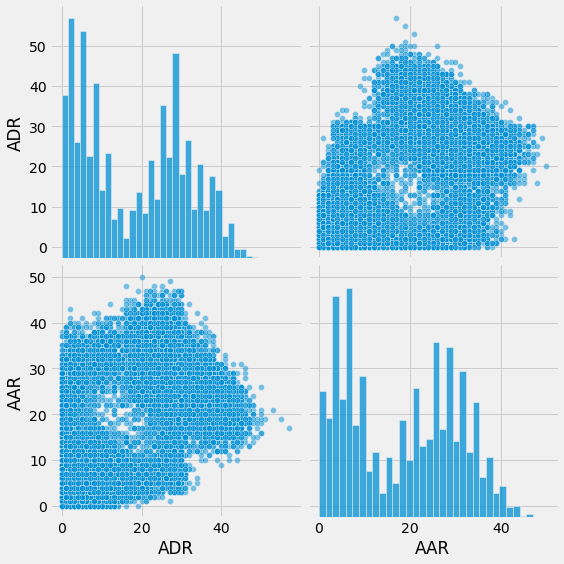

In [23]:
sns.pairplot(data=df, vars=[pred_col, target_col], size=4, plot_kws={'alpha': .5})


In [24]:
sns.pairplot(trn.sample(n=10000), vars=['u', 'dered_u'], hue='class', size=5)


NameError: name 'trn' is not defined

In [25]:
Data['WS_over20'] = 0
Data['WS_over20'][Data['WSPD']>20] =1

# Categorical Variables

In [40]:
mmmm = pd.DataFrame({'mm' :Data["AAR"] + Data["ADR"]})

In [42]:
mmmm.idxmax()

mm    2848
dtype: int64

In [43]:
Data[2845:2850]

,AAR,EAD,ADR,EDD,year,month,day,hour,DayName,Arpt_cond,P_Airp,P_AAR,P_ADR,Arrival_remainder,Departure_remainder,WD_400,WD_500,WD_700,WD_850,WD_925,WD_1000,WS_400,WS_500,WS_700,WS_850,WS_925,WS_1000,WD,WSPD,WS_GST,VIS,WC,TMP,TD,PS,PA,RN,HM,CA_TOT,CLA_1LYR,BASE_1LYR,CLA_2LYR,BASE_2LYR,CLA_3LYR,BASE_3LYR,CLA_4LYR,BASE_4LYR,RVR,WDIR_t6,WSPD_t6,WG_t6,VIS_t6,WC_t6,CLA_1LYR_t6,BASE_1LYR_t6,CLA_2LYR_t6,BASE_2LYR_t6,CLA_3LYR_t6,BASE_3LYR_t6,WDIR_t12,WSPD_t12,WG_t12,VIS_t12,WC_t12,CLA_1LYR_t12,BASE_1LYR_t12,CLA_2LYR_t12,BASE_2LYR_t12,CLA_3LYR_t12,BASE_3LYR_t12,WDIR_t18,WSPD_t18,WG_t18,VIS_t18,WC_t18,CLA_1LYR_t18,BASE_1LYR_t18,CLA_2LYR_t18,BASE_2LYR_t18,CLA_3LYR_t18,BASE_3LYR_t18,WDIR_t24,WSPD_t24,WG_t24,VIS_t24,WC_t24,CLA_1LYR_t24,BASE_1LYR_t24,CLA_2LYR_t24,BASE_2LYR_t24,CLA_3LYR_t24,BASE_3LYR_t24,WS_over20
2845,22.0,26.0,39.0,30.0,2018,4,29,13,7,1.0,1.0,35.0,23.0,0.0,12.0,190.0,145.0,115.0,250.0,245.0,230.0,9.0,7.0,1.0,70.0,43.0,29.0,22,9,0.0,1000,1,199,21,10142,10134,0.0,31.0,2,2.0,180.0,0.0,400.0,0.0,400.0,0.0,400.0,1000.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,0
2846,28.0,27.0,31.0,35.0,2018,4,29,14,7,1.0,1.0,22.0,39.0,4.0,0.0,190.0,145.0,115.0,250.0,245.0,230.0,9.0,7.0,1.0,70.0,43.0,29.0,22,9,0.0,1000,1,196,30,10137,10129,0.0,33.0,2,2.0,180.0,0.0,400.0,0.0,400.0,0.0,400.0,1000.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,0
2847,28.0,35.0,28.0,26.0,2018,4,29,15,7,1.0,1.0,28.0,31.0,0.0,4.0,190.0,145.0,115.0,250.0,245.0,230.0,9.0,7.0,1.0,70.0,43.0,29.0,23,11,0.0,1000,1,189,25,10131,10123,0.0,34.0,1,1.0,180.0,0.0,400.0,0.0,400.0,0.0,400.0,1000.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,0
2848,47.0,35.0,30.0,26.0,2018,4,29,16,7,1.0,1.0,28.0,28.0,7.0,0.0,190.0,145.0,115.0,250.0,245.0,230.0,9.0,7.0,1.0,70.0,43.0,29.0,24,11,0.0,1000,1,190,21,10125,10117,0.0,33.0,0,0.0,400.0,0.0,400.0,0.0,400.0,0.0,400.0,1000.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,0
2849,40.0,41.0,26.0,20.0,2018,4,29,17,7,1.0,1.0,47.0,30.0,0.0,0.0,190.0,145.0,115.0,250.0,245.0,230.0,9.0,7.0,1.0,70.0,43.0,29.0,32,6,0.0,1000,1,181,35,10120,10112,0.0,38.0,0,0.0,400.0,0.0,400.0,0.0,400.0,0.0,400.0,1000.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,240.0,10.0,0.0,6000.0,0,0,400.0,0,400.0,0,400.0,0


In [26]:
Data['AAR'].value_counts()

5.0     1146
6.0     1128
4.0     1098
7.0     1097
3.0     1049
2.0      960
8.0      894
26.0     879
28.0     855
27.0     853
1.0      829
25.0     826
29.0     796
9.0      774
24.0     756
30.0     739
32.0     718
31.0     698
23.0     691
22.0     677
33.0     635
10.0     599
34.0     579
21.0     573
20.0     560
35.0     539
19.0     508
11.0     451
18.0     437
0.0      401
36.0     389
17.0     333
37.0     330
12.0     330
13.0     300
15.0     296
16.0     292
38.0     259
39.0     239
14.0     235
40.0     178
41.0     124
42.0      96
43.0      65
44.0      43
45.0      16
46.0      16
47.0      13
48.0       3
50.0       1
49.0       1
Name: AAR, dtype: int64

In [27]:

# label, Oridinal Encoding = 각 category를 정수로 변환하는 것
Data_cat = Data.copy()
oe = OrdinalEncoder()
Data_cat[cat_cols] = oe.fit_transform(Data[cat_cols])

# nominal - categorical variables 사이에 상하관계가 X
# ordinal - 상하관계, 순서가 O


# Decision tree이외의 algo는 one-hot encoding을 해야함!!
# pd.get_dummies
# from sklearn.preprocessing import OneHotEncoder

NameError: name 'cat_cols' is not defined

In [ ]:
# Target Encoding
# 각 category를 해당 cateory 안의 요소들의 label의 평균값으로 변환
# -> overfitting에 취약 -> CV, smoothing과 같이 사용

# Data[['원하는 column', '타켓 칼럼 = AAR, ADR']].groupby('원하는 column').transform('mean')

Data[['원하는 column', '타켓 칼럼 = AAR, ADR']].groupby('원하는 column').transform('mean')

In [ ]:
# Frequency Encoding
# 각 category를 요소들의 빈도로 변환

# pd.DataFrame(Data['원하는 column']].value_counts())
# Data.groupby('원하는 column')[['타겟 칼럼']].transform('count')

In [ ]:
# Hashing Trick
# 각각의 범주를 Hash 함수에 적용한 값으로 변환 

# from sklearn.feature_extraction import FeatureHasher
# fh = FeatureHasher()
# X = hstack([Data[num_cols]] + [fh.fit_transform(df[col]) for col in cat_cols])

# Feature Enginnering

Prepare data

1. Checking for NaN values and removing constant features in the training data
2. Removing duplicated columns
3. Drop Sparse Data

Add Features<br>
1. Sumzeros and Sumvalues 
2. Other Aggregates
3. K-Means 
4. PCA : Principal component analysis 



In [70]:
poly = PolynomialFeatures(degree = 2, interaction_only = True)
X = poly.fit_transform(Data[ftr])
print(X.shape)

(26304, 407)


In [69]:
feature=['EAD', 'EDD', 'Arpt_cond', 'P_Airp', 'P_AAR', 'P_ADR','Arrival_remainder','Departure_remainder',
         'WD', 'WSPD', 'WS_GST', 'VIS', 'WC', 'TMP', 'TD', 'PS', 'PA', 'RN', # 'HM',
         'CA_TOT', 'CLA_1LYR', 'BASE_1LYR', 'CLA_2LYR', 'BASE_2LYR', 'CLA_3LYR', 'BASE_3LYR', 'CLA_4LYR', 'BASE_4LYR', 'RVR']

In [ ]:
# Feature Scaling

# decision tree류의 알고리즘은 Scaling(standardization, normalization)이 큰 의미 X


"""
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(df[num_cols])
lr = LinearRegression()
lr.fit(X, np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(X))

scaler = MinMaxScaler()
X = scaler.fit_transform(df[num_cols])
lr = LinearRegression()
lr.fit(X, np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(X))
"""

In [ ]:
#Binning

#어떤 feature를 n개의 그룹으로 나누고, 그것을 새로운 categorical data로 넣는 것

"""
df['time_bin'] = pd.qcut(df['time'], 4, labels=False)
sns.pairplot(data=df, vars=['time', 'time_bin'], size=4, plot_kws={'alpha': .5})


X = pd.concat([df[num_cols], pd.get_dummies(pd.qcut(df['time'], 4, labels=False))], axis=1)    
# get_dummies 는 one-hot encoding해주는 것(decision tree 계열을 안 하는게 보통 더 좋은 결과를 냄)

lr = LinearRegression()
lr.fit(X, np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(X))
"""

In [ ]:
# Polynomial Regression

# 연속적인 몇개의 feature들을 조합해서 새로운 feature를 만드는 것 (overfitting 위험 O)

"""
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)        # 2차(x^2, x1 * x2 등) 까지만 만들겠다
X = poly.fit_transform(df[num_cols])

lr = LinearRegression()
lr.fit(X, np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(X))
"""

In [ ]:
# Checking for NaN values and removing constant features in the training data
# Removing duplicated columns
# Drop Sparse Data

### Add Features
# Sumzeros and Sumvalues
# Other Aggregates
# K-Means
# PCA : Principal component analysis



# Save

In [ ]:
# 필요없는 것을 버리기
Data_temp = Data.drop('TMP', axis=1)
Data_temp = Data_temp.drop('TD', axis=1)
Data_temp = Data_temp.drop('HM', axis=1)
Data_temp = Data_temp.drop('PS', axis=1)
Data_temp = Data_temp.drop('PA', axis=1)

#고층바람 너무 높은 고도는 뺴자 
Data_temp = Data_temp.drop('WD_400', axis=1)
Data_temp = Data_temp.drop('WD_500', axis=1)
Data_temp = Data_temp.drop('WD_700', axis=1)
Data_temp = Data_temp.drop('WS_400', axis=1)
Data_temp = Data_temp.drop('WS_500', axis=1)
Data_temp = Data_temp.drop('WS_700', axis=1)

In [ ]:
# drop TAF
for i in range(6,30,6):
    Data_temp = Data_temp.drop(f'WDIR_t{i}', axis=1)
    Data_temp = Data_temp.drop(f'WSPD_t{i}', axis=1)
    Data_temp = Data_temp.drop(f'WG_t{i}', axis=1)
    Data_temp = Data_temp.drop(f'VIS_t{i}', axis=1)
    Data_temp = Data_temp.drop(f'WC_t{i}', axis=1)
    Data_temp = Data_temp.drop(f'CLA_1LYR_t{i}', axis=1)
    Data_temp = Data_temp.drop(f'BASE_1LYR_t{i}', axis=1)
    Data_temp = Data_temp.drop(f'CLA_2LYR_t{i}', axis=1)
    Data_temp = Data_temp.drop(f'BASE_2LYR_t{i}', axis=1)
    Data_temp = Data_temp.drop(f'CLA_3LYR_t{i}', axis=1)
    Data_temp = Data_temp.drop(f'BASE_3LYR_t{i}', axis=1)

In [ ]:
# 각 시간에 맞는 TAF로 나누기
taf6 = [12,18,24]
taf12 = [6,18,24]
taf18 = [6,12,24]
taf24 = [6,12,18]
    
# 각 시간에 맞는 taf 넣기
data_taf = {}
for i in range(6,30,6):
    data_taf[f'Data_{i}'] = Data_temp    
    data_taf[f'Data_{i}'] = data_taf[f'Data_{i}'].join(Data[f'WDIR_t{i}'])
    data_taf[f'Data_{i}'] = data_taf[f'Data_{i}'].join(Data[f'WSPD_t{i}'])
    data_taf[f'Data_{i}'] = data_taf[f'Data_{i}'].join(Data[f'WG_t{i}'])
    data_taf[f'Data_{i}'] = data_taf[f'Data_{i}'].join(Data[f'VIS_t{i}'])
    data_taf[f'Data_{i}'] = data_taf[f'Data_{i}'].join(Data[f'WC_t{i}'])
    data_taf[f'Data_{i}'] = data_taf[f'Data_{i}'].join(Data[f'CLA_1LYR_t{i}'])
    data_taf[f'Data_{i}'] = data_taf[f'Data_{i}'].join(Data[f'BASE_1LYR_t{i}'])
    data_taf[f'Data_{i}'] = data_taf[f'Data_{i}'].join(Data[f'CLA_2LYR_t{i}'])
    data_taf[f'Data_{i}'] = data_taf[f'Data_{i}'].join(Data[f'BASE_2LYR_t{i}'])
    data_taf[f'Data_{i}'] = data_taf[f'Data_{i}'].join(Data[f'CLA_3LYR_t{i}'])
    data_taf[f'Data_{i}'] = data_taf[f'Data_{i}'].join(Data[f'BASE_3LYR_t{i}'])
    
Data_6 = data_taf['Data_6']
Data_12 = data_taf['Data_12']
Data_18 = data_taf['Data_18']
Data_24 = data_taf['Data_24']

In [ ]:
# save total data for Jupyter notebook
Data.to_csv('..\\data\\data.csv')
Data_6.to_csv('..\\data\\data_6.csv')
Data_12.to_csv('..\\data\\data_12.csv')
Data_18.to_csv('..\\data\\data_18.csv')
Data_24.to_csv('..\\data\\data_24.csv')

In [ ]:
# save data for .py

column_name_a = ['taf', 'label', 'EAD', 'EDD', 'year', 'month', 'day', 'hour', 'DayName', 'Arpt_cond',
               'P_Airp', 'P_AAR', 'P_ADR', 'Arrival_remainder', 'Departure_remainder',
               'WD_850', 'WD_925', 'WD_1000', 'WS_850', 'WS_925', 'WS_1000',
               'WD', 'WSPD', 'WS_GST', 'VIS', 'WC', 'RN', 
               'CA_TOT', 'CLA_1LYR', 'BASE_1LYR','CLA_2LYR', 'BASE_2LYR', 'CLA_3LYR', 'BASE_3LYR', 'CLA_4LYR','BASE_4LYR', 'RVR',
               'WDIR_t', 'WSPD_t', 'WG_t', 'VIS_t', 'WC_t',
               'CLA_1LYR_t', 'BASE_1LYR_t', 'CLA_2LYR_t', 'BASE_2LYR_t', 'CLA_3LYR_t', 'BASE_3LYR_t']
column_name_d = ['taf', 'EAD', 'label', 'EDD', 'year', 'month', 'day', 'hour', 'DayName', 'Arpt_cond',
               'P_Airp', 'P_AAR', 'P_ADR', 'Arrival_remainder', 'Departure_remainder',
               'WD_850', 'WD_925', 'WD_1000', 'WS_850', 'WS_925', 'WS_1000',
               'WD', 'WSPD', 'WS_GST', 'VIS', 'WC', 'RN', 
               'CA_TOT', 'CLA_1LYR', 'BASE_1LYR','CLA_2LYR', 'BASE_2LYR', 'CLA_3LYR', 'BASE_3LYR', 'CLA_4LYR','BASE_4LYR', 'RVR',
               'WDIR_t', 'WSPD_t', 'WG_t', 'VIS_t', 'WC_t',
               'CLA_1LYR_t', 'BASE_1LYR_t', 'CLA_2LYR_t', 'BASE_2LYR_t', 'CLA_3LYR_t', 'BASE_3LYR_t']
arrival_train = pd.DataFrame([], columns = column_name_a)
arrival_test = pd.DataFrame([], columns = column_name_a)
departure_train = pd.DataFrame([], columns = column_name_d)
departure_test = pd.DataFrame([], columns = column_name_d)

In [ ]:
for i in range(6,30,6):

    data_name = 'Data_' + str(i) + '.csv'            
    data_file = data_dir / data_name
    Data_raw = pd.read_csv(data_file, index_col=0)
    Data_m = pd.read_csv(data_file, index_col=0)
    Data_d = Data_m.drop('AAR', axis=1)
    Data_a = Data_m.drop('ADR', axis=1)

    # Arrival
    train_a = Data_a
    train_a.rename(columns = {'AAR' : 'label'}, inplace = True)

    # Departure
    train_d = Data_d
    train_d.rename(columns = {'ADR' : 'label'}, inplace = True)

    # temp dataframe
    temp_train_a = pd.DataFrame({'taf' : i * np.ones(len(train_a))}).join(train_a)
    temp_train_a.columns = column_name_a
    temp_train_d = pd.DataFrame({'taf' : i * np.ones(len(train_d))}).join(train_d)
    temp_train_d.columns = column_name_d


    # append
    arrival_train = arrival_train.append(temp_train_a)
    departure_train = departure_train.append(temp_train_d)

In [ ]:
# Save
arrival_train.reset_index(drop=True).to_csv('..\\input\\arrival_train.csv')
departure_train.reset_index(drop=True).to_csv('..\\input\\departure_train.csv')